## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
dataset = pd.read_csv('loan-prediction.csv')
dataset.head(24)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Data Wrangling / Cleaning

### Handling Missing Values

In [3]:
dataset.isna().sum() #Checking Null Values of each columns

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
dataset.dtypes #Checking data types of each columns

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [5]:
for i in dataset.columns: #Fill NaN Values of each columns
    if dataset[i].dtypes == 'object':
        dataset[i].replace(np.nan, dataset[i].value_counts().index[0], inplace=True)
    else:
        dataset[i].replace(np.nan, dataset[i].mean(), inplace=True)

### Data Normalization

In [6]:
for i in dataset.columns: #Normalization values of each columns with data types is not 'object'
    if dataset[i].dtypes != 'object' and i != 'Credit_History':
        dataset[i] = (dataset[i]-dataset[i].mean())/dataset[i].std()
    else:
        continue

In [7]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,0.072931,-0.554036,3.382028e-16,0.279623,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,-0.134302,-0.038700,-2.190947e-01,0.279623,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,-0.393427,-0.554036,-9.568608e-01,0.279623,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,-0.461686,0.251774,-3.142903e-01,0.279623,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.097649,-0.554036,-6.440178e-02,0.279623,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,0.002217,0.879882,1.434929e+00,0.279623,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,-0.502609,-0.035966,-6.117767e-01,0.279623,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,-0.387534,0.301668,1.378889e-01,0.279623,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,-0.228753,-0.032549,2.568835e-01,0.279623,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,1.217464,3.194108,2.410685e+00,0.279623,1.0,Semiurban,N


### Data Binning

In [8]:
for i in dataset.columns:
    if dataset[i].dtypes != 'object' and i not in ['Credit_History', 'Loan_Amount_Term']:
        bins = np.linspace(min(dataset[i]), max(dataset[i]), 6)
        group_names = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
        dataset[i + '-binned'] = pd.cut(dataset[i], bins, labels=group_names, include_lowest=True)
        dataset[i + '-binned'].astype('object')
        dataset.drop(i, axis = 1, inplace=True)

In [9]:
dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome-binned,CoapplicantIncome-binned,LoanAmount-binned
0,LP001002,Male,No,0,Graduate,No,0.279623,1.0,Urban,Y,Very Low,Very Low,Very Low
1,LP001003,Male,Yes,1,Graduate,No,0.279623,1.0,Rural,N,Very Low,Very Low,Very Low
2,LP001005,Male,Yes,0,Graduate,Yes,0.279623,1.0,Urban,Y,Very Low,Very Low,Very Low
3,LP001006,Male,Yes,0,Not Graduate,No,0.279623,1.0,Urban,Y,Very Low,Very Low,Very Low
4,LP001008,Male,No,0,Graduate,No,0.279623,1.0,Urban,Y,Very Low,Very Low,Very Low
5,LP001011,Male,Yes,2,Graduate,Yes,0.279623,1.0,Urban,Y,Very Low,Very Low,Low
6,LP001013,Male,Yes,0,Not Graduate,No,0.279623,1.0,Urban,Y,Very Low,Very Low,Very Low
7,LP001014,Male,Yes,3+,Graduate,No,0.279623,0.0,Semiurban,N,Very Low,Very Low,Low
8,LP001018,Male,Yes,2,Graduate,No,0.279623,1.0,Urban,Y,Very Low,Very Low,Low
9,LP001020,Male,Yes,1,Graduate,No,0.279623,1.0,Semiurban,N,Very Low,Low,Medium


## Exploratory Data Analysis

### Descriptive Statistics

In [10]:
dataset.describe() #Summary statistics of dataset

,Loan_Amount_Term,Credit_History
count,6.140000e+02,614.000000
mean,1.066827e-17,0.842199
std,1.000000e+00,0.349681
min,-5.126414e+00,0.000000
25%,2.796226e-01,1.000000
50%,2.796226e-01,1.000000
75%,2.796226e-01,1.000000
max,2.143773e+00,1.000000


In [11]:
dataset.dtypes

Loan_ID                       object
Gender                        object
Married                       object
Dependents                    object
Education                     object
Self_Employed                 object
Loan_Amount_Term             float64
Credit_History               float64
Property_Area                 object
Loan_Status                   object
ApplicantIncome-binned      category
CoapplicantIncome-binned    category
LoanAmount-binned           category
dtype: object

#### Descriptive Statistics Categorical Variable

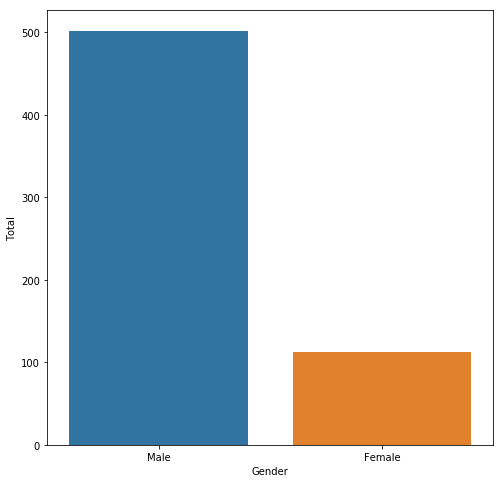

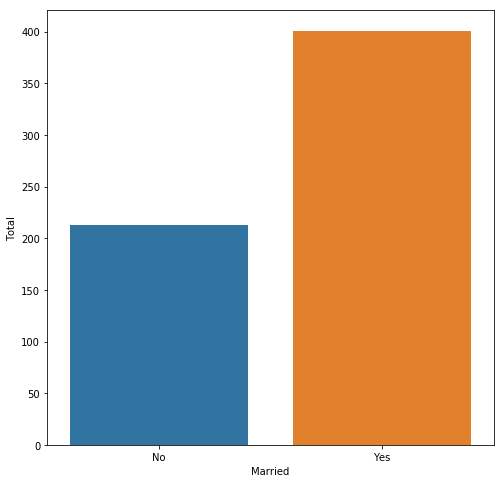

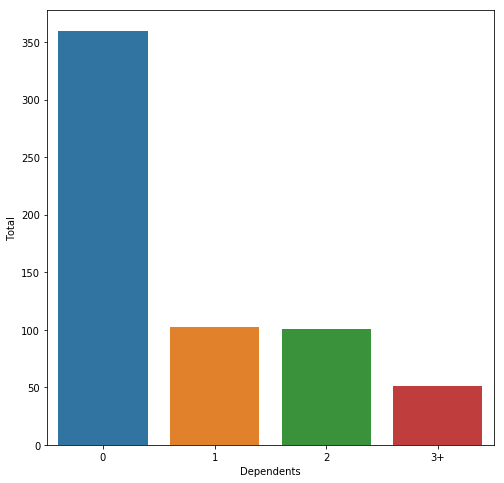

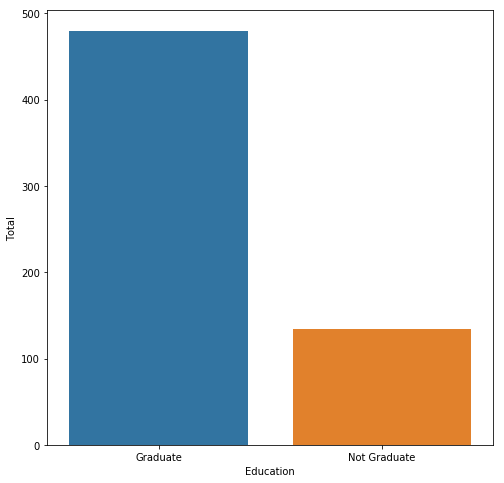

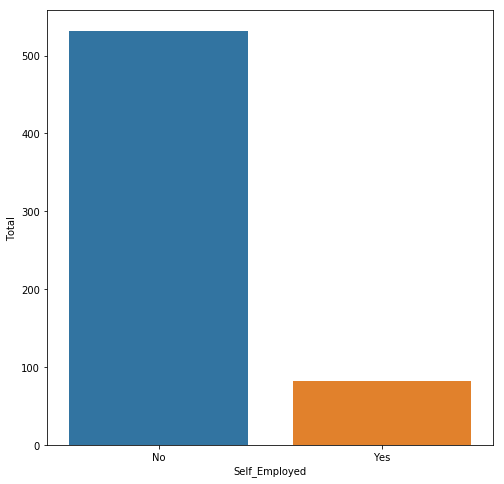

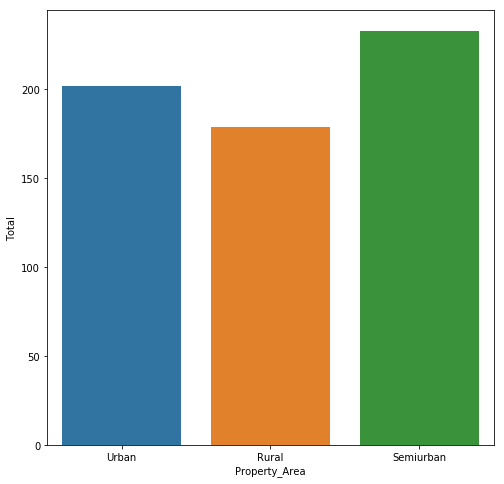

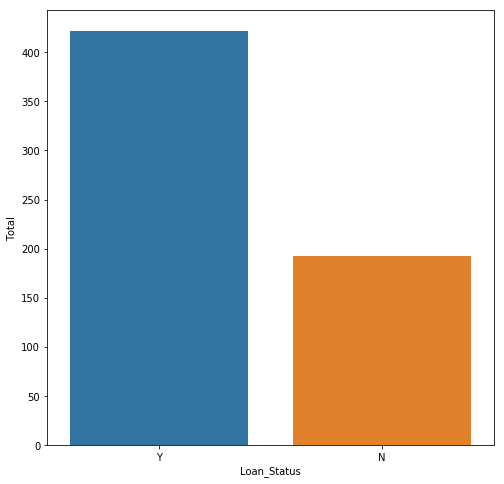

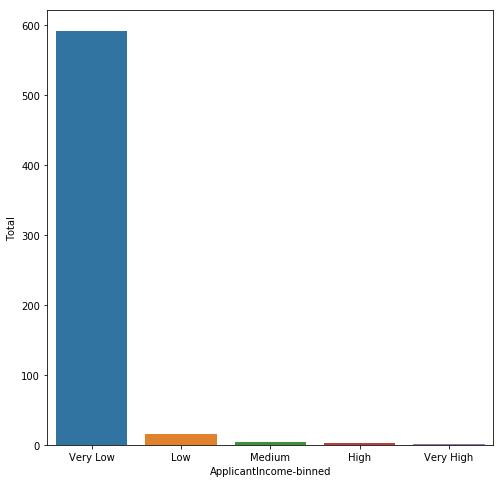

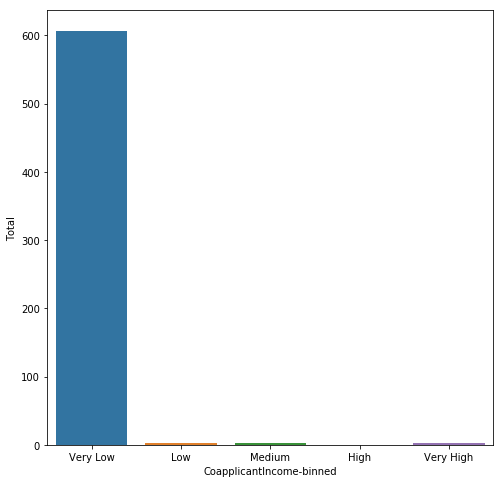

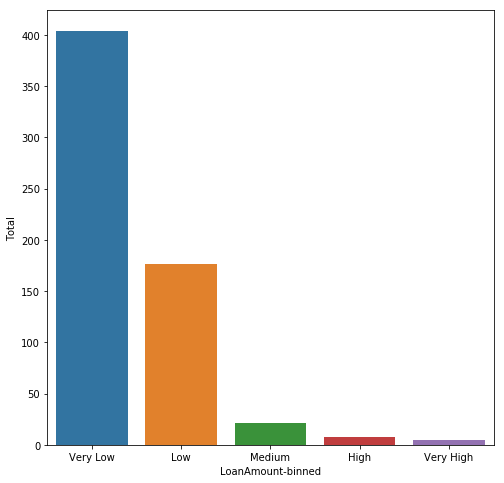

In [13]:
for i in dataset.columns: # Univariate Analysis
    if dataset[i].dtypes != 'float64' and i != 'Loan_ID':
        plt.figure(figsize=(8,8))
        ax = sns.countplot(x=i, data=dataset, )
        ax.set(ylabel='Total')
        plt.show()

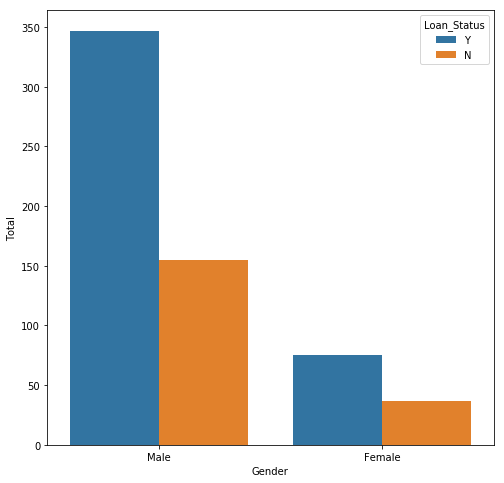

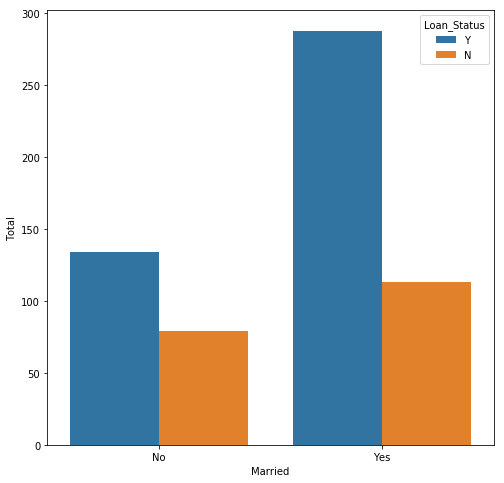

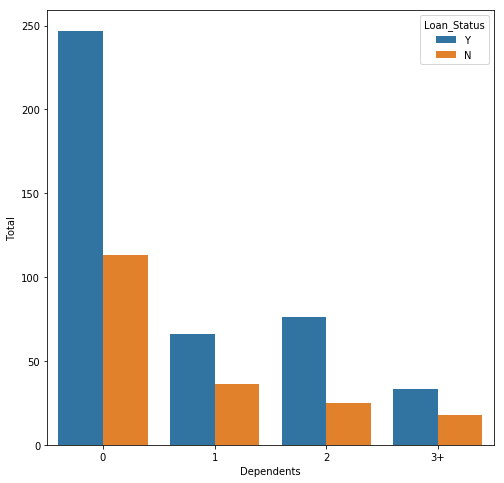

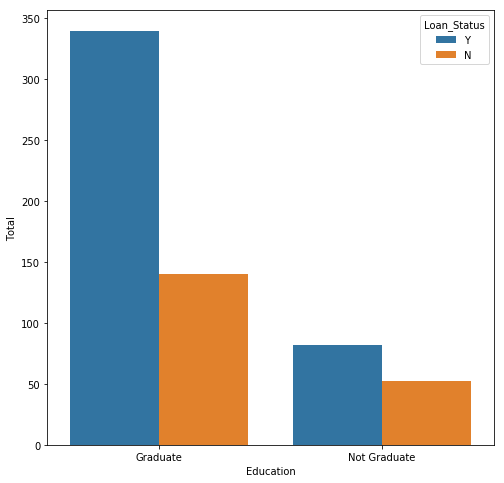

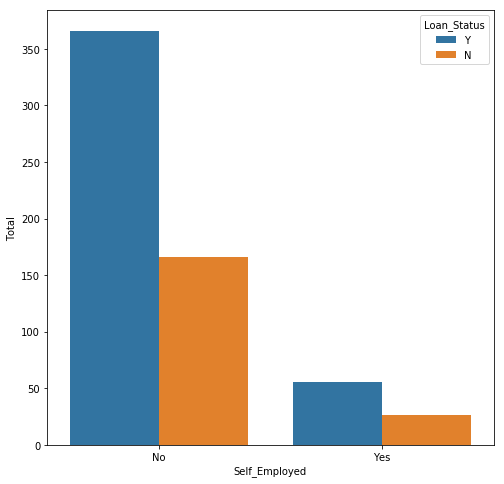

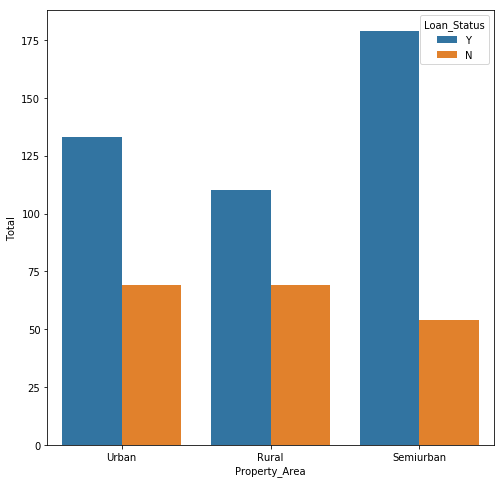

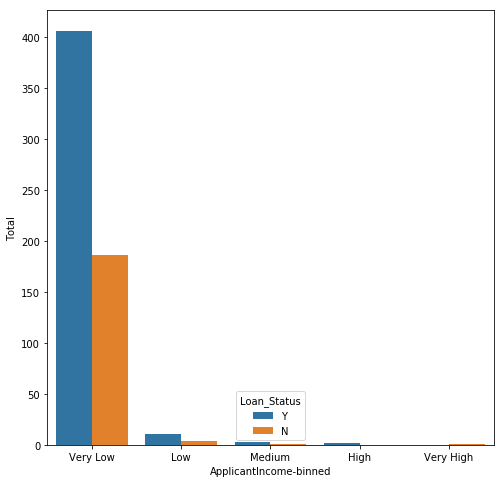

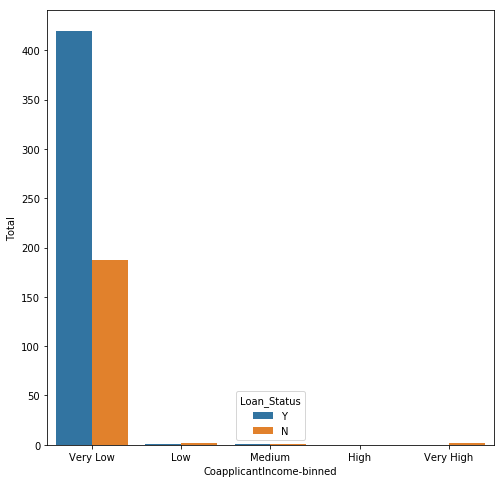

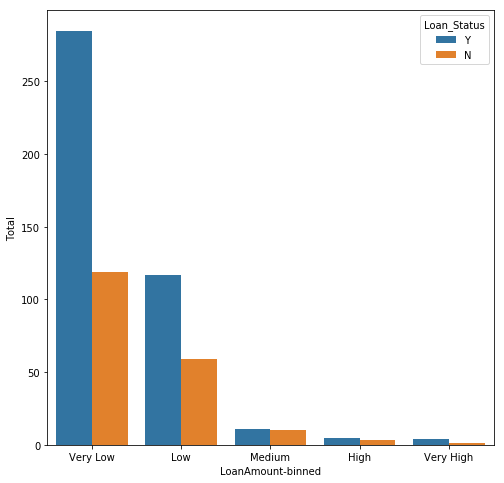

In [14]:
for i in dataset.columns: # Bivariate Analysis
    if dataset[i].dtypes != 'float64' and i not in ['Loan_ID', 'Loan_Status']:
        plt.figure(figsize=(8,8))
        ax = sns.countplot(x=i, data=dataset, hue='Loan_Status' )
        ax.set(ylabel = 'Total')
        plt.close